In [1]:
import requests
import json
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
### Request the necessary data from the API and store it locally ###
sdate = date(2022,2,9) 
edate = date(2022,4,22)
datesIdx = pd.date_range(start=sdate,end=edate).to_pydatetime().tolist()
dates = []

for dateIdx in datesIdx:
  dates.append(dateIdx.strftime('%Y-%m-%d'))
 
##define parameters
period =  "DAILY_COMPETITION"	# "DAILY", "WEEKLY", "MONTHLY", "ALLTIME", "COMPETITION", "DAILY_COMPETITION", or "LEAGUES".
sortBy = "PERCENT" 	#Which PNL to sort ranks by. "ABSOLUTE" or "PERCENT".

with open("dailyCompData.json", "w") as f:
  DailyPnl = []
  for date in dates:
    startingBeforeOrAt = date	 #Latest the leaderboard starts at.
    response = requests.get("https://api.dydx.exchange/v3/leaderboard-pnl?period=" + period + "&startingBeforeOrAt="+ startingBeforeOrAt + "&sortBy=" + sortBy)
    responseJson = response.json()
    topPnl = {"date":date,
              "topPnl":responseJson['topPnls']
              }
    DailyPnl.append(topPnl)
  json.dump(DailyPnl, f)

In [3]:
with open('dailyCompData.json') as json_file:
  data = json.load(json_file)
  df = pd.json_normalize(data,  meta=['date'], record_path=['topPnl']) #create a dataframe from the json_file
  df.to_csv('top100PnlDaily.csv')

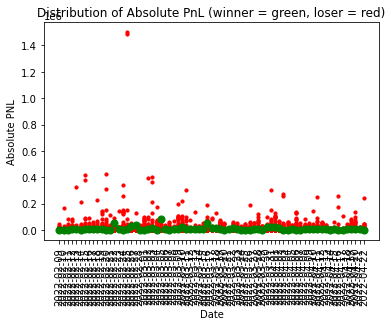

In [4]:
top100df = pd.read_csv("top100PnlDaily.csv") 
winnersDf = top100df[top100df["hedgieWon"].notna()]
plt.scatter(x = top100df.date, y = top100df.absolutePnl, color='red', s = 10)
plt.scatter(x = winnersDf.date, y = winnersDf.absolutePnl, color='green', s = 50, zorder = 2.5)
plt.xticks(rotation=90)
plt.title("Distribution of Absolute PnL (winner = green, loser = red)")
plt.xlabel("Date")
plt.ylabel("Absolute PNL")
plt.show()

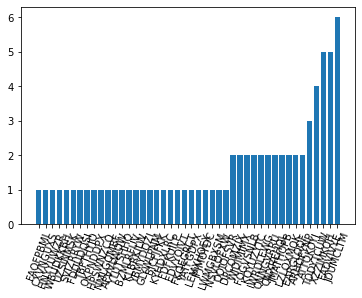

In [6]:
#Show the distribution of hedge
winnersDf = top100df[top100df["hedgieWon"].notna()]
winnersIds = winnersDf["publicId"].tolist()
WinnersIdsUnique = set(winnersIds)
WinnersFrq = []

for traderId in WinnersIdsUnique:
  WinnersFrq.append((traderId, winnersIds.count(traderId)))
freqOrderDesc = sorted(WinnersFrq, key=lambda tup: tup[1])

plt.bar(range(len(freqOrderDesc)), [val[1] for val in freqOrderDesc], align='center')
plt.xticks(range(len(freqOrderDesc)), [val[0] for val in freqOrderDesc])
plt.xticks(rotation=70)
plt.show()